# LUMEN NATJECANJE


In [1]:
import  pandas as pd


dataset_path = './data/lumen/export_df.parquet'
# Read data and store it in DataFrame titled original_data
original_data=pd.read_parquet(dataset_path)

#return first 10 rows to see what the data looks like
original_data.head(10)


/home/stipe7777/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/stipe7777/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id
0,0,2015-07-01,2015-01-21,2015-07-01,None,2,0.0,PRT,0,0,100.000000,Check-Out,1313223,1077152
1,0,2015-07-01,2015-06-10,2015-07-01,None,2,0.0,PRT,0,0,100.000000,Check-Out,1313224,1017906
2,0,2015-07-01,2015-05-13,2015-07-02,None,1,0.0,GBR,0,1,64.991345,Check-Out,1313225,1039896
3,0,2015-07-01,2014-05-30,2015-07-02,None,1,0.0,GBR,1,1,74.368897,Check-Out,1313226,1008245
4,0,2015-07-01,2014-07-06,2015-07-03,None,2,0.0,GBR,2,1,130.973278,Check-Out,1313227,1093703
5,0,2015-07-01,2015-04-21,2015-07-03,None,2,0.0,GBR,2,1,143.304560,Check-Out,1313228,1044263
6,0,2015-07-01,2015-06-25,2015-07-03,None,2,0.0,PRT,0,0,161.502814,Check-Out,1313229,1022260
7,0,2015-07-01,2014-09-15,2015-07-03,None,2,0.0,PRT,0,0,151.176542,Check-Out,1313230,1101557
8,0,2015-07-01,2015-06-30,2015-07-04,2015-05-06,2,0.0,PRT,2,1,61.437192,Canceled,1313231,1075633
9,0,2015-07-01,2015-06-28,2015-07-04,2015-04-22,2,0.0,PRT,2,2,150.365262,Canceled,1313232,1056139


In [2]:
#print the size of the data
original_data.shape

(119210, 14)

In [92]:
#types of data in the dataset
original_data.dtypes

hotel_id                                  int32
datum_dolaska                    datetime64[ns]
datum_kreiranja_rezervacije      datetime64[ns]
datum_odjave                     datetime64[ns]
datum_otkazivanja_rezervacije            object
broj_odraslih_gostiju                     int64
broj_djece_gostiju                      float64
zemlja_gosta                             object
kanal_prodaje_id                          int32
tip_sobe_id                               int32
cijena_nocenja                          float64
status_rezervacije                       object
rezervacija_id                            int32
gost_id                                   int32
dtype: object

In [4]:
#print out the names of features
original_data.columns

Index(['hotel_id', 'datum_dolaska', 'datum_kreiranja_rezervacije',
       'datum_odjave', 'datum_otkazivanja_rezervacije',
       'broj_odraslih_gostiju', 'broj_djece_gostiju', 'zemlja_gosta',
       'kanal_prodaje_id', 'tip_sobe_id', 'cijena_nocenja',
       'status_rezervacije', 'rezervacija_id', 'gost_id'],
      dtype='object')

In [93]:
#check how many hotels we got in dataset
hotels_ids=original_data["hotel_id"].unique()
print("Hotel ids",hotels_ids)

Hotel ids [0 1]


In [6]:
#get the number of missing data points per column
missing_values_count=original_data.isnull().sum()
print(missing_values_count)

hotel_id                             0
datum_dolaska                        0
datum_kreiranja_rezervacije          0
datum_odjave                         0
datum_otkazivanja_rezervacije    75011
broj_odraslih_gostiju                0
broj_djece_gostiju                   0
zemlja_gosta                         0
kanal_prodaje_id                     0
tip_sobe_id                          0
cijena_nocenja                       0
status_rezervacije                   0
rezervacija_id                       0
gost_id                              0
dtype: int64


In [94]:
#The previous output indicates that only datum_otkazivanja_rezervacije has null values.
#Which makes sense if guest came to the hotel there shouldn't be a value in datum_otkazivanja_rezervacije

In [95]:
# Check for duplicate rows
duplicate_mask = original_data.duplicated()

# Check if there are any duplicate rows
if duplicate_mask.any():
    # Print out which rows are duplicated
    duplicated_rows = original_data[duplicate_mask]
    print("Duplicate rows found:")
    print(duplicated_rows)
else:
    # Print a message indicating there are no duplicate rows
    print("There are no duplicate rows.")

There are no duplicate rows.


In [99]:
#get the values for column zemlja_gost-> good info for EVENTS table 
#so we can know when and where to expect guests

#From which countries people come
guest_countries=original_data["zemlja_gosta"].unique()
guest_countries.sort()
#print(guest_countries)

#how many visitors dont have defined country 
zero_countries_count=(original_data["zemlja_gosta"]=="0").sum()
print("Number of rows with zero countries:",zero_countries_count)

#how many people come from which country
countries_count=original_data["zemlja_gosta"].value_counts()
countries_count.head(10) #only first 10 countries

Number of rows with zero countries: 552


zemlja_gosta
PRT    49886
GBR    12492
FRA     9811
ESP     8725
DEU     6795
ITA     3567
IRL     3554
BEL     2204
BRA     2123
NLD     2032
Name: count, dtype: int64

In [9]:
original_data["cijena_nocenja"].value_counts()

cijena_nocenja
100.000000    1850
75.000000      669
80.000000      398
60.000000      166
79.200000      160
              ... 
142.905239       1
106.755988       1
142.851230       1
152.692077       1
193.709372       1
Name: count, Length: 111461, dtype: int64

In [10]:
#check if date columns are in correct form

#original_data["datum_dolaska"].dtype
#original_data["datum_odjave"].dtype
#original_data["datum_kreiranja_rezervacije"].dtype
#original_data["datum_otkazivanja_rezervacije"].dtype
#proba=type(original_data.loc[9,"datum_otkazivanja_rezervacije"])
#proba_value=original_data.loc[9,"datum_otkazivanja_rezervacije"]
proba=original_data["datum_dolaska"].dtype
#proba_value=original_data.loc[5,"datum_dolaska"]
print(proba)

#the dates in column "datum_otkazivanja_rezervacije" have a lot of None values
# and the value of dates is different from other columns with dates 

#BITNO!->POTREBNO PRETVORITI SVE DATUME U POSEBNE STUPCE->jer algoritmi za predviđanje mogu samo brojeve



datetime64[ns]


In [102]:
#IDEJE:
#Kreirati stupac sa ukupan broj gostiju->al onda bi triba kad predviđam maknit broj odraslih i djece
#Target variable ce biti broj_odraslih gostiju i broj_djece gostiju i onda cemo to usporediti-> detaljnije je nego samo ukupan broj
#Napraviti scatter plot da vidi kako broj ljudi ide kroz godinu
#napraviti prvo model za cijelu godinu pa vidit kako ispadne 
#napraviti line chart da isto pokaže kretanje gostiju
#neka ti prvi model bude random tree, onda forrest i onda usporediti
#za usporedbu koristi MAE


## POTREBNO NAPRAVITI FUNKCIJU KOJA CE PROVJERITI JESU LI DATUM DOLASKA I ODLASKA KRONOLOŠKI

## NAKON TOGA POTREBNO JE VIDJETI JELI DATUM REZERVACIJE KRONOLOŠKI(je li rezervirano prije nego što je gost došao u hotel)

## NAKON TOGA POTREBNO JE PROVJERITI JE LI DATUM OTKAZA REZERVACIJE U REDU!
###   ako su gosti dosli u hotel i proveli neko vrijeme onda je potrebno postaviti stupac datum_otkaza_rezervacije u 0
###   i kad smo to sve provjerili onda je također potrebno provjeriti stupad status_rezervacije:
####      &nbsp;&nbsp;   ako je rezervacija=None onda status_rezervacije je Checkout
####      &nbsp;&nbsp;   ako rezervacija ima neki datum i gosti su proveli neko virjeme onda status_rezervacije biti canceled
####     &nbsp;&nbsp;   ako rezervacija ima neki datum i gosti nisu dosli onda status_rezervacije treba biti No-show

In [103]:
#Create separate dataset for each hotel
hotel_id_0=original_data[original_data["hotel_id"]==0]
hotel_id_1=original_data[original_data["hotel_id"]==1]

#Ovo sam napravio da svaki hotel usporedimo zasebno i onda donesemo neke zaključke,zapažanja

## HOTEL_ID_0

In [13]:
hotel_id_0.head()

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id
0,0,2015-07-01,2015-01-21,2015-07-01,None,2,0.0,PRT,0,0,100.000000,Check-Out,1313223,1077152
1,0,2015-07-01,2015-06-10,2015-07-01,None,2,0.0,PRT,0,0,100.000000,Check-Out,1313224,1017906
2,0,2015-07-01,2015-05-13,2015-07-02,None,1,0.0,GBR,0,1,64.991345,Check-Out,1313225,1039896
3,0,2015-07-01,2014-05-30,2015-07-02,None,1,0.0,GBR,1,1,74.368897,Check-Out,1313226,1008245
4,0,2015-07-01,2014-07-06,2015-07-03,None,2,0.0,GBR,2,1,130.973278,Check-Out,1313227,1093703


In [14]:
hotel_id_0.shape

(40047, 14)

In [104]:
#average value of cijena_nocenja 
hotel_id_0["cijena_nocenja"].mean()

127.14454385798855

In [105]:
#how many types of rooms does the hotel have
tip_sobe=hotel_id_0["tip_sobe_id"].unique()
print(tip_sobe)

[0 1 2 3 4 5 6 7 8]


In [107]:
#how many times were rooms booked
hotel_id_0["tip_sobe_id"].value_counts()

tip_sobe_id
1    23389
2     7432
3     4982
4     1610
5     1106
0      918
6      601
7        6
8        3
Name: count, dtype: int64

In [109]:
# Group the data by 'datum_dolaska' and aggregate the 'broj_odraslih_gostiju','broj_djece_gostiju' and 'cijena_nocenja' columns
daily_guests = hotel_id_0.groupby('datum_dolaska').agg({
    'broj_odraslih_gostiju': 'sum',
    'broj_djece_gostiju': 'sum',
    'cijena_nocenja':'sum'
}).reset_index()
daily_guests['total_guests'] = daily_guests['broj_odraslih_gostiju'] + daily_guests['broj_djece_gostiju']


daily_guests.head(10)

#I wanted to get information how many people were on the same day at the hotel, and also the sum of cijena_nocenja

,datum_dolaska,broj_odraslih_gostiju,broj_djece_gostiju,cijena_nocenja,total_guests
0,2015-07-01,80,2.0,4807.563996,82.0
1,2015-07-02,90,4.0,6121.771858,94.0
2,2015-07-03,84,4.0,5377.575132,88.0
3,2015-07-04,99,10.0,6085.924801,109.0
4,2015-07-05,88,10.0,5824.736392,98.0
5,2015-07-06,87,8.0,6042.346243,95.0
6,2015-07-07,71,8.0,4650.816043,79.0
7,2015-07-08,58,2.0,4123.042875,60.0
8,2015-07-09,68,9.0,4672.149655,77.0
9,2015-07-10,86,15.0,5911.014115,101.0


# Datumi sa najvecom: broj_odraslih_gostiju, broj_djece_gostiju, cijena_nocenja, ukupan zbroj broj_odraslih_gostiju i broj_djece_gostiju

## Highest value of total_guests(sum of broj_odraslih_gostiju and broj_djece_gostiju)

In [111]:
# Find the maximum value of total guests
max_total_guests = daily_guests['total_guests'].max()

# Filter the DataFrame to get the row(s) with the highest number of total guests
row_highest_total_guests = daily_guests[daily_guests['total_guests'] == max_total_guests]

print("datum_dolaska with the highest number of total guests:")
print(row_highest_total_guests)

# Get the top datum_dolaska with the highest number of total guests
top_10_rows_highest_total_guests = daily_guests.nlargest(10, 'total_guests')

print("Top 10 rows with the highest number of total guests:")
top_10_rows_highest_total_guests

datum_dolaska with the highest number of total guests:
    datum_dolaska  broj_odraslih_gostiju  broj_djece_gostiju  cijena_nocenja  \
157    2015-12-05                    435                19.0    19012.473221   

     total_guests  
157         454.0  
Top 10 rows with the highest number of total guests:


,datum_dolaska,broj_odraslih_gostiju,broj_djece_gostiju,cijena_nocenja,total_guests
157,2015-12-05,435,19.0,19012.473221,454.0
267,2016-03-24,341,30.0,18100.939108,371.0
226,2016-02-12,347,5.0,16100.518088,352.0
668,2017-04-29,296,26.0,17527.597546,322.0
240,2016-02-26,302,9.0,14607.596681,311.0
694,2017-05-25,272,30.0,14474.484276,302.0
316,2016-05-12,284,6.0,12201.399694,290.0
548,2016-12-30,258,23.0,29258.436966,281.0
78,2015-09-17,255,6.0,14200.499172,261.0
605,2017-02-25,210,27.0,9369.938524,237.0


## Highest values of broj_odraslih_gostiju

In [20]:
# Find the maximum sum value of broj_odraslih_gostiju 
max_broj_odraslih_gostiju = daily_guests['broj_odraslih_gostiju'].max()

# Filter the DataFrame to get the row(s) with the highest number of total guests
row_highest_broj_odraslih_gostiju = daily_guests[daily_guests['broj_odraslih_gostiju'] == max_broj_odraslih_gostiju]

print("Row(s) with the highest number of broj_odraslih_gostiju :")
print(row_highest_broj_odraslih_gostiju)

# Get the top 10 rows with the highest number of total guests
top_10_rows_highest_broj_odraslih_gostiju = daily_guests.nlargest(10, 'broj_odraslih_gostiju')

print("Top 10 rows with the highest number of broj_odraslih_gostiju:")
top_10_rows_highest_broj_odraslih_gostiju

Row(s) with the highest number of broj_odraslih_gostiju :
    datum_dolaska  broj_odraslih_gostiju  broj_djece_gostiju  cijena_nocenja  \
157    2015-12-05                    435                19.0    19012.473221   

     total_guests  
157         454.0  
Top 10 rows with the highest number of broj_odraslih_gostiju:


,datum_dolaska,broj_odraslih_gostiju,broj_djece_gostiju,cijena_nocenja,total_guests
157,2015-12-05,435,19.0,19012.473221,454.0
226,2016-02-12,347,5.0,16100.518088,352.0
267,2016-03-24,341,30.0,18100.939108,371.0
240,2016-02-26,302,9.0,14607.596681,311.0
668,2017-04-29,296,26.0,17527.597546,322.0
316,2016-05-12,284,6.0,12201.399694,290.0
694,2017-05-25,272,30.0,14474.484276,302.0
548,2016-12-30,258,23.0,29258.436966,281.0
78,2015-09-17,255,6.0,14200.499172,261.0
463,2016-10-06,224,9.0,10412.146708,233.0


## Highest value of broj_djece_gostiju

In [112]:
# Find the maximum sum value of broj_djece_gostiju
max_broj_djece_gostiju = daily_guests['broj_djece_gostiju'].max()

# Filter the DataFrame to get the row(s) with the highest number of broj_djece_gostiju
row_highest_broj_djece_gostiju = daily_guests[daily_guests['broj_djece_gostiju'] == max_broj_djece_gostiju]

print("datum_dolaska with the highest number of broj_djece_gostiju :")
print(row_highest_broj_djece_gostiju)

# Get the top 10 rows with the highest number of broj_djece_gostiju
top_10_rows_highest_broj_djece_gostiju = daily_guests.nlargest(10, 'broj_djece_gostiju')

print("Top 10 rows with the highest number of broj_djece_gostiju:")
top_10_rows_highest_broj_djece_gostiju

datum_dolaska with the highest number of broj_djece_gostiju :
    datum_dolaska  broj_odraslih_gostiju  broj_djece_gostiju  cijena_nocenja  \
759    2017-07-29                    139                42.0     17695.46527   

     total_guests  
759         181.0  
Top 10 rows with the highest number of broj_djece_gostiju:


,datum_dolaska,broj_odraslih_gostiju,broj_djece_gostiju,cijena_nocenja,total_guests
759,2017-07-29,139,42.0,17695.465270,181.0
731,2017-07-01,179,34.0,15617.829914,213.0
766,2017-08-05,135,34.0,19334.711342,169.0
778,2017-08-17,178,33.0,23341.262529,211.0
397,2016-08-01,181,32.0,18106.086738,213.0
768,2017-08-07,169,32.0,21023.894753,201.0
787,2017-08-26,132,32.0,17349.119587,164.0
267,2016-03-24,341,30.0,18100.939108,371.0
409,2016-08-13,165,30.0,19243.668570,195.0
694,2017-05-25,272,30.0,14474.484276,302.0


## Highest value of cijena_nocenja

In [22]:
# Find the maximum sum value of cijena_nocenja
max_cijena_nocenja = daily_guests['cijena_nocenja'].max()

# Filter the DataFrame to get the row(s) with the highest number of cijena_nocenja
row_highest_cijena_nocenja = daily_guests[daily_guests['cijena_nocenja'] == max_cijena_nocenja]

print("Row(s) with the highest number of cijena_nocenja :")
print(row_highest_cijena_nocenja)

# Get the top 10 rows with the highest number of cijena_nocenja
top_10_rows_highest_cijena_nocenja = daily_guests.nlargest(10, 'cijena_nocenja')

print("Top 10 rows with the highest number of cijena_nocenja:")
top_10_rows_highest_cijena_nocenja

Row(s) with the highest number of cijena_nocenja :
    datum_dolaska  broj_odraslih_gostiju  broj_djece_gostiju  cijena_nocenja  \
548    2016-12-30                    258                23.0    29258.436966   

     total_guests  
548         281.0  
Top 10 rows with the highest number of cijena_nocenja:


,datum_dolaska,broj_odraslih_gostiju,broj_djece_gostiju,cijena_nocenja,total_guests
548,2016-12-30,258,23.0,29258.436966,281.0
778,2017-08-17,178,33.0,23341.262529,211.0
182,2015-12-30,223,8.0,22123.611286,231.0
768,2017-08-07,169,32.0,21023.894753,201.0
766,2017-08-05,135,34.0,19334.711342,169.0
409,2016-08-13,165,30.0,19243.668570,195.0
789,2017-08-28,160,20.0,19139.485311,180.0
411,2016-08-15,153,19.0,19049.970612,172.0
157,2015-12-05,435,19.0,19012.473221,454.0
754,2017-07-24,156,24.0,18955.207546,180.0


## Highest spenders from zemlja_gost

In [113]:
# Group the original DataFrame by 'zemlja_gosta' and calculate the sum of accommodation prices for each country
sum_accommodation_prices_by_country = hotel_id_0.groupby('zemlja_gosta')['cijena_nocenja'].sum()

# Sort the sum of accommodation prices for each country in descending order
sorted_sum_accommodation_prices = sum_accommodation_prices_by_country.sort_values(ascending=False).head(20)

# Display the sorted result
print("Sum of accommodation prices for each country (sorted in descending order):")
print(sorted_sum_accommodation_prices.apply(lambda x: '{:.2f}'.format(x)))


#Želio sam dobiti uvid koliko koja zemlja potroši u hotelu, logicno da PRT jer je i njih najvise!
#Pronaci onda potroseno prosjecno po danu->Dat ce bolji uvid !

Sum of accommodation prices for each country (sorted in descending order):
zemlja_gosta
PRT    2255639.69
GBR     747828.94
ESP     600103.44
IRL     252928.68
FRA     201943.09
DEU     135238.38
CN       92426.56
USA      77794.23
CHE      70828.07
ITA      62617.46
BRA      58853.50
NLD      57767.92
BEL      56661.22
0        47153.93
POL      38120.23
SWE      37054.19
RUS      30282.43
ROU      27658.17
AUT      24077.45
FIN      16656.97
Name: cijena_nocenja, dtype: object


In [114]:
#Uzimao san za najvece potrošače , a ne za sve zemlje jer realno nas ne zanima neka drzava koja je bila 1 put!

# 1. Filter the DataFrame to include only data for the top 10 countries with the highest spending
top_10_countries = hotel_id_0.groupby('zemlja_gosta')['cijena_nocenja'].sum().nlargest(10).index
filtered_data = hotel_id_0[hotel_id_0['zemlja_gosta'].isin(top_10_countries)]

# 2. Group the filtered data by both 'zemlja_gosta' and 'datum_dolaska' and calculate the total spending for each day for each country
daily_spending_by_country = filtered_data.groupby(['zemlja_gosta', 'datum_dolaska'])['cijena_nocenja'].sum()

# 3. Find the top 5 days with the highest spending for each country
top_5_days_spending_by_country = daily_spending_by_country.groupby(level='zemlja_gosta').nlargest(5)

# 4. Display the top 5 days with the highest spending for each country
print("Top 5 days with the highest spending for each country:")
print(top_5_days_spending_by_country)

# 5. Group the filtered data by 'zemlja_gosta' and the month of 'datum_dolaska' and calculate the total spending for each month for each country
monthly_spending_by_country = filtered_data.groupby([filtered_data['zemlja_gosta'], filtered_data['datum_dolaska'].dt.month])['cijena_nocenja'].sum()

# 6. Find the month with the highest spending for each country
max_spending_month_by_country = monthly_spending_by_country.groupby(level='zemlja_gosta').idxmax()

# 7. Display the month with the highest spending for each country
print("\nMonth with the highest spending for each country:")
print(max_spending_month_by_country)

Top 5 days with the highest spending for each country:
zemlja_gosta  zemlja_gosta  datum_dolaska
CHE           CHE           2017-07-17        2033.360340
                            2017-07-29        2013.852723
                            2017-07-24        1833.520370
                            2017-08-07        1821.657300
                            2017-08-27        1564.312045
CN            CN            2017-06-26        3254.903083
                            2016-09-26        2355.774867
                            2017-05-25        1956.160367
                            2017-07-09        1847.526397
                            2015-09-12        1438.940332
DEU           DEU           2016-04-04        3717.644153
                            2016-04-30        3484.687277
                            2016-04-18        3126.397408
                            2016-05-16        3102.996020
                            2016-05-14        3091.887165
ESP           ESP           2017-

In [115]:
#how many different values are for kanal_prodaje_id

kanali_prodaje=hotel_id_0["kanal_prodaje_id"].unique()
print(kanali_prodaje)

[0 1 2 3]


In [116]:
#how many times was each kanal_prodaje_id used
hotel_id_0["kanal_prodaje_id"].value_counts()

kanal_prodaje_id
2    28919
0     7862
1     3265
3        1
Name: count, dtype: int64

In [117]:
#prices that were payed
hotel_id_0["cijena_nocenja"].value_counts()

cijena_nocenja
100.000000    739
367.199081      1
391.659719      1
99.635692       1
243.953432      1
             ... 
198.331528      1
171.203419      1
143.536334      1
184.600082      1
138.331230      1
Name: count, Length: 39309, dtype: int64

In [118]:
#for each room how many times was cijena_nocenja=100
hotel_id_0[hotel_id_0["cijena_nocenja"]==100]["tip_sobe_id"].value_counts()

tip_sobe_id
1    499
2     80
3     65
5     41
4     32
0     16
6      6
Name: count, dtype: int64

In [29]:
# Top 5 highest values
top_5_highest = hotel_id_0['cijena_nocenja'].nlargest(5)
print("Top 5 highest values:")
print(top_5_highest)

# Top 5 lowest values
top_5_lowest = hotel_id_0['cijena_nocenja'].nsmallest(5)
print("\nTop 5 lowest values:")
print(top_5_lowest)

# Get the index of the row with the highest value in cijena_nocenja column
highest_price_index = hotel_id_0['cijena_nocenja'].idxmax()

# Get the row corresponding to the highest value
row_with_highest_price = hotel_id_0.loc[highest_price_index]

print("Row with the highest value in cijena_nocenja column:")
print(row_with_highest_price)

# Get the index of the row with the highest value in cijena_nocenja column
lowest_price_index = hotel_id_0['cijena_nocenja'].idxmin()

# Get the row corresponding to the lowest value
row_with_lowest_price = hotel_id_0.loc[lowest_price_index]

print("Row with the lowest value in cijena_nocenja column:")
print(row_with_lowest_price)


Top 5 highest values:
38982    765.832355
15076    744.266820
13587    744.144012
38734    725.561541
39834    712.171352
Name: cijena_nocenja, dtype: float64

Top 5 lowest values:
20711    40.003037
36480    40.007639
31990    40.009442
21658    40.009526
4594     40.011572
Name: cijena_nocenja, dtype: float64
Row with the highest value in cijena_nocenja column:
hotel_id                                           0
datum_dolaska                    2017-08-01 00:00:00
datum_kreiranja_rezervacije      2017-03-27 00:00:00
datum_odjave                     2017-08-05 00:00:00
datum_otkazivanja_rezervacije                   None
broj_odraslih_gostiju                              3
broj_djece_gostiju                               1.0
zemlja_gosta                                     ESP
kanal_prodaje_id                                   2
tip_sobe_id                                        4
cijena_nocenja                            765.832355
status_rezervacije                         Check-Ou

In [30]:
#Ukupan broj gostiju_odraslih za hotel 0
odrasli=hotel_id_0["broj_odraslih_gostiju"].sum()
print("ukupaan broj gostiju odraslih",odrasli)
#Ukupan broj gostiju djece
djeca=hotel_id_0["broj_djece_gostiju"].sum()
print("ukupaan broj gostiju djece:",djeca)

#Ukupan brojj gostiju
ukupno=hotel_id_0["broj_odraslih_gostiju"].sum()+hotel_id_0["broj_djece_gostiju"].sum()
print("ukupaan broj gostiju :",ukupno)
#POSTOTAK ODRASLIH  GOSTIJU
print("postotak odraaslih gostiju:",odrasli/ukupno)

#POSTOTAK ODRASLIH  GOSTIJU
print("postotak djece gostiju:",djeca/ukupno)

ukupaan broj gostiju odraslih 74798
ukupaan broj gostiju djece: 5712.0
ukupaan broj gostiju : 80510.0
postotak odraaslih gostiju: 0.92905229164079
postotak djece gostiju: 0.07094770835921003


In [31]:
hotel_id_0["broj_odraslih_gostiju"].value_counts()
#zanimljivo->hotel 0->preko nći imaoo 50,40 odddraslih gostiju, a hotel 1 je imao samo->2,0,1,3,4

broj_odraslih_gostiju
2     31425
1      7148
3      1427
4        31
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: count, dtype: int64

In [32]:
num_guest_40=hotel_id_0[hotel_id_0["broj_odraslih_gostiju"]==40]
num_guest_40.head(10)

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id
1539,0,2015-09-03,2015-01-06,2015-09-06,2015-01-02,40,0.0,PRT,0,1,100.0,Canceled,1314762,1087576


In [119]:
#OVO POVISE MI JE MALO SUMNJIVO-> da u jednoj sobi bude 40 odraslih gostiju!

In [120]:
#how many people come from which country
countries_count=hotel_id_0["zemlja_gosta"].value_counts()
print(countries_count.head(10)) #opet pogledao prvih 10


zemlja_gosta
PRT    17790
GBR     6754
ESP     3937
IRL     2163
FRA     1591
DEU     1217
CN       693
NLD      507
USA      473
0        464
Name: count, dtype: int64


In [34]:
print("Broj otkazanih rezervacija za hotel_id_0:",len(hotel_id_0.index)-hotel_id_0["datum_otkazivanja_rezervacije"].isnull().sum())

Broj otkazanih rezervacija za hotel_id_0: 11120


## Iduce 4 linije nam govore da ako postoji dolasci,odjava da bi onda tkazivanje trebalo biti NOn 

In [35]:
hotel_id_0["datum_dolaska"].isnull().sum()

0

In [36]:
hotel_id_0["datum_odjave"].isnull().sum()

0

In [37]:
hotel_id_0["datum_kreiranja_rezervacije"].isnull().sum()

0

In [38]:
#s obziron da hotel ima oko 40000 redaka i da su datumi u redu onda bi isto toliko redova tribalo 
#i za otkazivanje rezervacije
hotel_id_0["datum_otkazivanja_rezervacije"].isnull().sum()

28927

In [39]:
hotel_id_0["status_rezervacije"].value_counts()

status_rezervacije
Check-Out    28927
Canceled     10829
No-Show        291
Name: count, dtype: int64

## U SLJEDECIM STUPCIMA SAN RADIO PROVJERE ZA DATUME
#### uglavnom bi trebali napraviti neku funkciju za provjeru datuma u tablici!

In [40]:
#sljedeči broj je jednak zbrooju canceled plus no show!
len(hotel_id_0.index)-hotel_id_0["datum_otkazivanja_rezervacije"].isnull().sum()

11120

In [41]:
no_show_rows=hotel_id_0[hotel_id_0["status_rezervacije"]=="No-Show"]
no_show_rows.head(10)

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id
122,0,2015-07-04,2015-02-22,2015-07-05,2015-07-04,1,0.0,PRT,0,3,153.390158,No-Show,1313345,1084007
328,0,2015-07-12,2015-07-09,2015-07-26,2015-07-12,2,10.0,PRT,2,2,230.333630,No-Show,1313551,1038409
343,0,2015-07-12,2015-06-24,2015-07-17,2015-07-12,2,0.0,PRT,2,5,117.813723,No-Show,1313566,1030571
467,0,2015-07-17,2014-07-11,2015-07-19,2015-07-17,2,0.0,PRT,2,1,182.619812,No-Show,1313690,1036862
472,0,2015-07-17,2014-11-12,2015-07-19,2015-07-17,1,0.0,PRT,2,1,185.641585,No-Show,1313695,1004897
970,0,2015-08-08,2014-10-27,2015-08-15,2015-08-08,2,0.0,PRT,0,1,288.374067,No-Show,1314193,1022171
1059,0,2015-08-12,2015-08-12,2015-08-13,2015-08-12,1,0.0,PRT,1,1,221.596173,No-Show,1314282,1095176
1063,0,2015-08-12,2014-12-07,2015-08-15,2015-08-12,2,0.0,PRT,2,4,259.119100,No-Show,1314286,1021446
1472,0,2015-08-31,2015-02-03,2015-09-03,2015-08-31,2,0.0,PRT,2,1,210.356102,No-Show,1314695,1104669
1553,0,2015-09-03,2015-02-14,2015-09-13,2015-09-03,2,2.0,PRT,0,4,159.280116,No-Show,1314776,1066683


In [42]:
#OVO JE ISPRAVNO-> oni su sve u isti dan napravili i no show je! jos triba pogledat!
same_dates=hotel_id_0[(hotel_id_0["datum_dolaska"]==hotel_id_0["datum_odjave"]) & (hotel_id_0["status_rezervacije"]=="No-Show")]
same_dates

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id
19496,0,2015-12-23,2015-12-23,2015-12-23,2015-12-23,2,0.0,PRT,2,1,100.0,No-Show,1332719,1002259
19816,0,2016-01-04,2015-12-16,2016-01-04,2016-01-04,2,0.0,PRT,2,2,100.0,No-Show,1333039,1039820
23727,0,2016-04-30,2015-10-24,2016-04-30,2016-04-30,2,0.0,ESP,2,2,100.0,No-Show,1336950,1092544
25326,0,2016-06-21,2016-01-23,2016-06-21,2016-06-21,1,0.0,PRT,2,1,100.0,No-Show,1338549,1048758
25557,0,2016-07-01,2016-02-18,2016-07-01,2016-07-01,2,0.0,PRT,2,1,100.0,No-Show,1338780,1106387
28543,0,2016-10-08,2016-08-01,2016-10-08,2016-10-08,2,0.0,PRT,1,1,100.0,No-Show,1341766,1062215


In [43]:
same_dates=hotel_id_0[(hotel_id_0["datum_dolaska"]==hotel_id_0["datum_odjave"]) & (hotel_id_0["status_rezervacije"]=="Canceled")]
same_dates

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id
10094,0,2017-02-12,2017-02-12,2017-02-12,2017-02-12,1,0.0,POL,2,1,100.0,Canceled,1323317,1073606
22550,0,2016-03-28,2016-03-24,2016-03-28,2016-03-28,1,0.0,PRT,2,1,100.0,Canceled,1335773,1103386
22963,0,2016-04-12,2016-04-12,2016-04-12,2016-04-12,1,0.0,BEL,1,1,100.0,Canceled,1336186,1076070
24653,0,2016-05-29,2016-02-18,2016-05-29,2016-05-29,2,0.0,PRT,0,0,100.0,Canceled,1337876,1051214


In [44]:
#Postotak Koliko se rezervacija otkaze
print((len(hotel_id_0.index)-hotel_id_0["datum_otkazivanja_rezervacije"].isnull().sum())/len(hotel_id_0.index))

0.27767373336329815


In [45]:
#PROVJERA datum dolaska i odlaska da su kronološki
hotel_id_0["datum_dolaska"]=pd.to_datetime(hotel_id_0["datum_dolaska"])
hotel_id_0["datum_odjave"]=pd.to_datetime(hotel_id_0["datum_odjave"])

is_valid=hotel_id_0["datum_odjave"] >= hotel_id_0["datum_dolaska"]
invalid_rows=hotel_id_0[~is_valid]

if invalid_rows.empty:
    print("ispravni datumi")
else:
    print("ima neispravnih redova")
    print(len(invalid_rows))
    print(invalid_rows.head(10))

ispravni datumi


/tmp/ipykernel_9061/2795260599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_id_0["datum_dolaska"]=pd.to_datetime(hotel_id_0["datum_dolaska"])
/tmp/ipykernel_9061/2795260599.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_id_0["datum_odjave"]=pd.to_datetime(hotel_id_0["datum_odjave"])


In [46]:
hotel_id_0["datum_kreiranja_rezervacije"]=pd.to_datetime(hotel_id_0["datum_kreiranja_rezervacije"])
hotel_id_0["datum_otkazivanja_rezervacije"]=pd.to_datetime(hotel_id_0["datum_otkazivanja_rezervacije"])


rows_with_values=hotel_id_0[~hotel_id_0["datum_otkazivanja_rezervacije"].isnull()]


is_valid=rows_with_values["datum_otkazivanja_rezervacije"] >= rows_with_values["datum_kreiranja_rezervacije"]
invalid_rows=rows_with_values[~is_valid]

print(invalid_rows["status_rezervacije"].value_counts())

print(invalid_rows[invalid_rows["status_rezervacije"]=="No-Show"])

if invalid_rows.empty:
    print("ispravni datumi")
else:
    print("ima neispravnih redova")
    print(len(invalid_rows))
    print(invalid_rows.head(10))


status_rezervacije
Canceled    4716
No-Show        1
Name: count, dtype: int64
      hotel_id datum_dolaska datum_kreiranja_rezervacije datum_odjave  \
7029         0    2016-07-17                  2016-06-09   2016-07-24   

     datum_otkazivanja_rezervacije  broj_odraslih_gostiju  broj_djece_gostiju  \
7029                    2016-03-28                      2                 0.0   

     zemlja_gosta  kanal_prodaje_id  tip_sobe_id  cijena_nocenja  \
7029          PRT                 2            1      162.729667   

     status_rezervacije  rezervacija_id  gost_id  
7029            No-Show         1320252  1105245  
ima neispravnih redova
4717
     hotel_id datum_dolaska datum_kreiranja_rezervacije datum_odjave  \
8           0    2015-07-01                  2015-06-30   2015-07-04   
9           0    2015-07-01                  2015-06-28   2015-07-04   
68          0    2015-07-03                  2015-07-02   2015-07-05   
114         0    2015-07-04                  2015-06-15 

/tmp/ipykernel_9061/720541325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_id_0["datum_kreiranja_rezervacije"]=pd.to_datetime(hotel_id_0["datum_kreiranja_rezervacije"])
/tmp/ipykernel_9061/720541325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_id_0["datum_otkazivanja_rezervacije"]=pd.to_datetime(hotel_id_0["datum_otkazivanja_rezervacije"])


In [47]:
#PROVJERA ako postoji datum dolaska i odjave onda nebi treba postojati otkazivanje rezervacie
hotel_id_0["datum_dolaska"]=pd.to_datetime(hotel_id_0["datum_dolaska"])
hotel_id_0["datum_odjave"]=pd.to_datetime(hotel_id_0["datum_odjave"])
hotel_id_0["datum_otkazivanja_rezervacije"]=pd.to_datetime(hotel_id_0["datum_otkazivanja_rezervacije"])

is_valid=hotel_id_0["datum_odjave"] >= hotel_id_0["datum_dolaska"]
valid_rows=hotel_id_0[is_valid]

valid_cancelled_rows=valid_rows[~valid_rows["datum_otkazivanja_rezervacije"].isnull()]
num_valid_cancelled_rows=len(valid_cancelled_rows)

print(num_valid_cancelled_rows)
print(valid_cancelled_rows.head(10))

#RAZMISLI AKO IMA DOLAZAK i ODLAZAk onda nebi trebalo imati 
#otkazivanje rezervaci
#PROVJERIo SI nema retka sa vrijednost 0 u stupcima dolasci odlasci!->što bi znacilo da otkazivanje rervacijeez treba biti none!
#POTREBNO NAPRAVITI FNKCIJU KOJA CE PRIMITI DATASET  I PROVJRITI JEU LI DATUMI KRONOLOŠKI,AKO SU KRONOLOŠKI ONDA PROVJERITI REZERVACIJE
#AKO NEŠTO NE ZADOVOLJAVA UVJET ONDA ReDAK TRIBA IZBRISATI


11120
    hotel_id datum_dolaska datum_kreiranja_rezervacije datum_odjave  \
8          0    2015-07-01                  2015-06-30   2015-07-04   
9          0    2015-07-01                  2015-06-28   2015-07-04   
10         0    2015-07-01                  2015-04-17   2015-07-05   
27         0    2015-07-01                  2015-01-04   2015-07-08   
32         0    2015-07-01                  2015-01-01   2015-07-11   
34         0    2015-07-02                  2015-03-01   2015-07-06   
35         0    2015-07-02                  2015-04-18   2015-07-06   
38         0    2015-07-02                  2014-11-09   2015-07-06   
40         0    2015-07-02                  2015-01-25   2015-07-07   
45         0    2015-07-02                  2015-05-24   2015-07-09   

   datum_otkazivanja_rezervacije  broj_odraslih_gostiju  broj_djece_gostiju  \
8                     2015-05-06                      2                 0.0   
9                     2015-04-22                      

/tmp/ipykernel_9061/4040504006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_id_0["datum_dolaska"]=pd.to_datetime(hotel_id_0["datum_dolaska"])
/tmp/ipykernel_9061/4040504006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_id_0["datum_odjave"]=pd.to_datetime(hotel_id_0["datum_odjave"])
/tmp/ipykernel_9061/4040504006.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [48]:
#PROVJERA datum dolaska i kreiranja rezervacije da su kronološki
hotel_id_0["datum_dolaska"]=pd.to_datetime(hotel_id_0["datum_dolaska"])
hotel_id_0["datum_kreiranja_rezervacije"]=pd.to_datetime(hotel_id_0["datum_kreiranja_rezervacije"])

is_valid=hotel_id_0["datum_dolaska"] >= hotel_id_0["datum_kreiranja_rezervacije"]
invalid_rows=hotel_id_0[~is_valid]

if invalid_rows.empty:
    print("ispravni datumi")
else:
    print("ima neispravnih redova")
    print(len(invalid_rows))
    print(invalid_rows.head(10))

ispravni datumi


/tmp/ipykernel_9061/2380393379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_id_0["datum_dolaska"]=pd.to_datetime(hotel_id_0["datum_dolaska"])
/tmp/ipykernel_9061/2380393379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_id_0["datum_kreiranja_rezervacije"]=pd.to_datetime(hotel_id_0["datum_kreiranja_rezervacije"])


## POSJECENOST HOTELA
#### odvojio san odrasle i djecu

<function matplotlib.pyplot.show(close=None, block=None)>

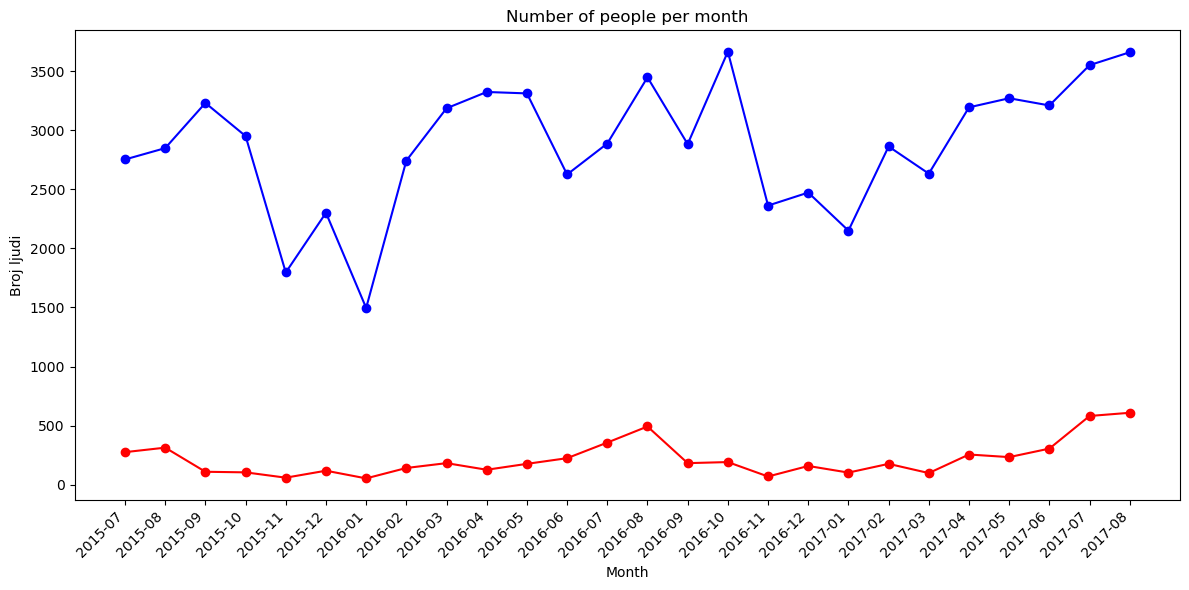

In [49]:
import matplotlib.pyplot as plt

proba=pd.to_datetime(hotel_id_0['datum_dolaska'])
# print(proba)

monthly_data=hotel_id_0.groupby(proba.dt.to_period("M")).agg({'broj_odraslih_gostiju':'sum'}).reset_index()
# print(monthly_data)
monthly_data_djeca=hotel_id_0.groupby(proba.dt.to_period("M")).agg({'broj_djece_gostiju':'sum'}).reset_index()

plt.figure(figsize=(12,6))

plt.plot(monthly_data['datum_dolaska'].dt.strftime('%Y-%m').values, monthly_data['broj_odraslih_gostiju'].values, marker='o', linestyle='-', color='b')
plt.plot(monthly_data_djeca['datum_dolaska'].dt.strftime('%Y-%m').values, monthly_data_djeca['broj_djece_gostiju'].values, marker='o', linestyle='-', color='r')

plt.title('Number of people per month')
plt.xlabel('Month')
plt.ylabel('Broj ljudi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show



/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<function matplotlib.pyplot.show(close=None, block=None)>

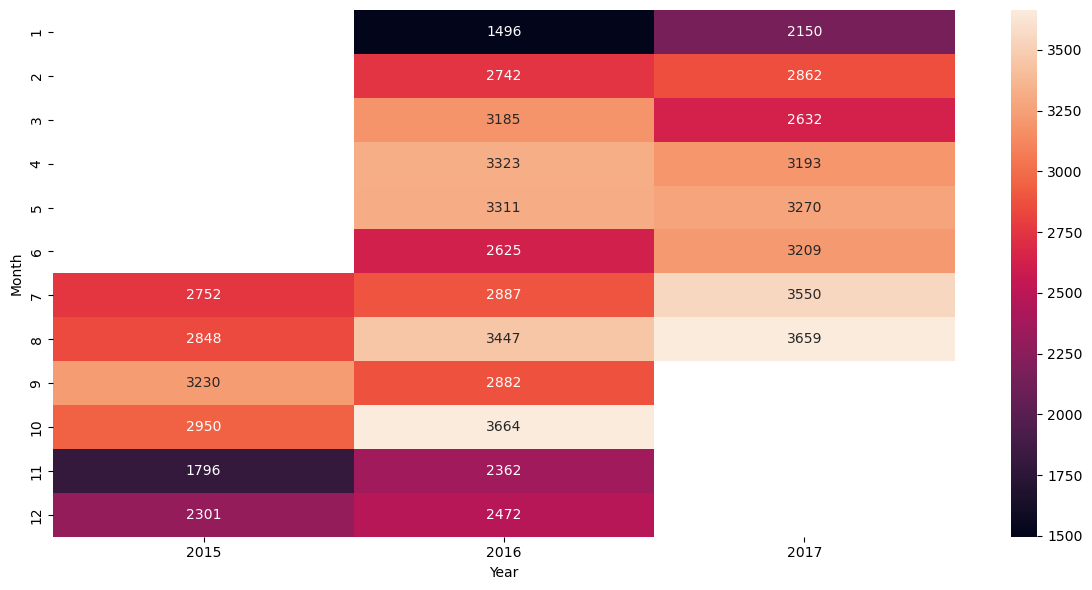

In [51]:
#show the number of guests per years for column "datum_dolaska" per months thru the years -> "broj_odraslih_gostiju"
#represented as heatmap
import seaborn as sns
import matplotlib.pyplot as plt

monthly_sum=hotel_id_0.groupby([hotel_id_0["datum_dolaska"].dt.year.rename("year"),hotel_id_0["datum_dolaska"].dt.month.rename("month")])["broj_odraslih_gostiju"].sum().reset_index()
#pivot_table=monthly_sum.pivot("month","year","broj_odraslih_gostiju")
pivot_table = monthly_sum.pivot(
    index="month",
    columns="year",
    values="broj_odraslih_gostiju"
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table,annot=True,fmt="g")

plt.xlabel('Year')
plt.ylabel('Month')
plt.tight_layout()
plt.show



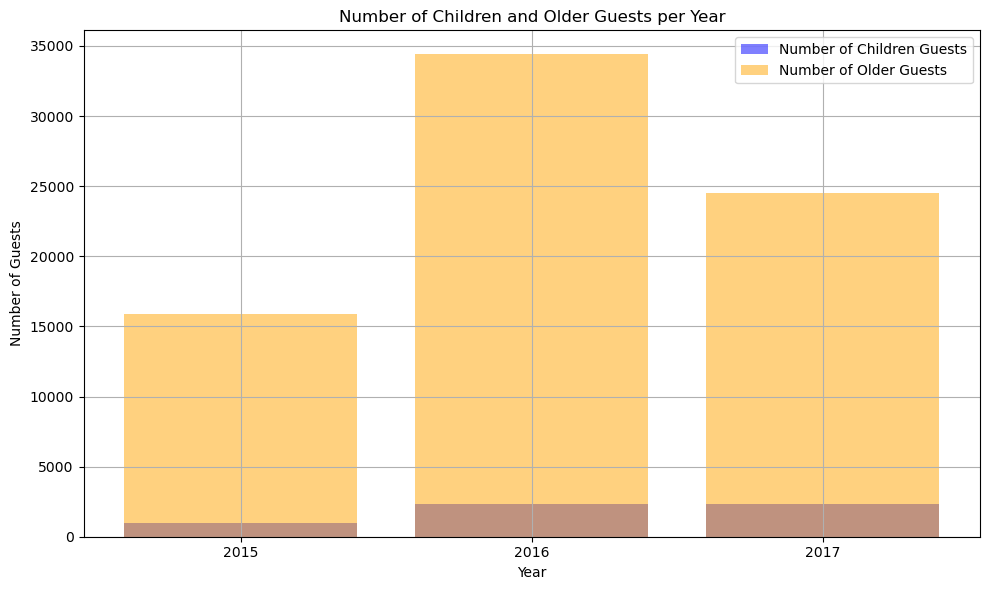

In [50]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Group the data by year and calculate the total number of children and older guests per year
grouped_data = hotel_id_0.groupby(hotel_id_0['datum_dolaska'].dt.year).agg({'broj_djece_gostiju': 'sum', 'broj_odraslih_gostiju': 'sum'})

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['broj_djece_gostiju'], color='blue', alpha=0.5, label='Number of Children Guests')
plt.bar(grouped_data.index, grouped_data['broj_odraslih_gostiju'], color='orange', alpha=0.5, label='Number of Older Guests')

plt.xlabel('Year')
plt.ylabel('Number of Guests')
plt.title('Number of Children and Older Guests per Year')
plt.legend()
plt.grid(True)
plt.xticks(grouped_data.index)  # Show all years on x-axis
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

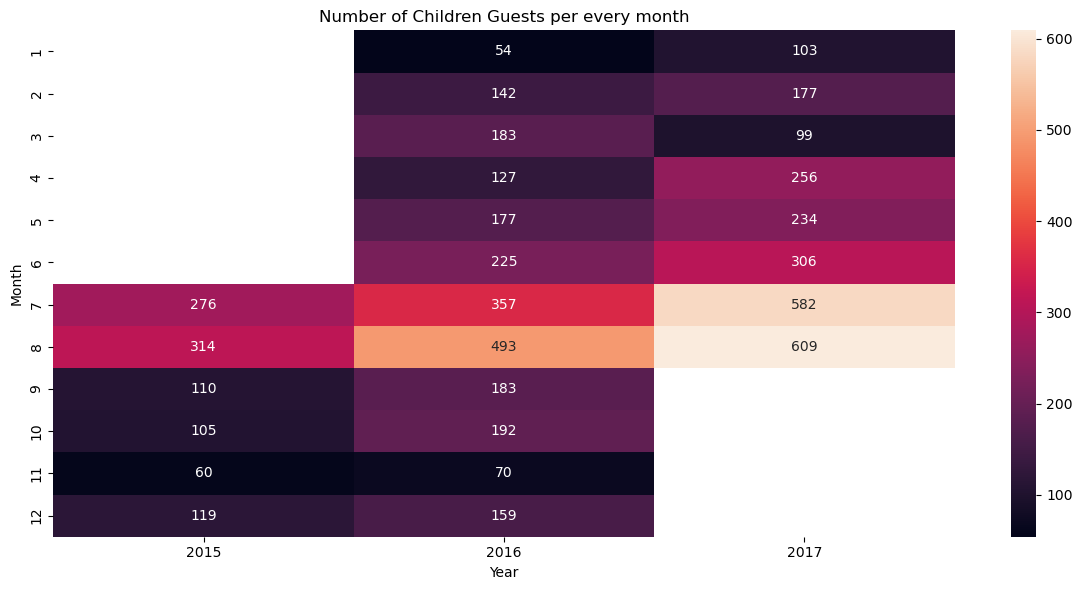

In [52]:
#show the number of guests per years for column "datum_dolaska" per months thru the years -> "broj_djece_gostiju"
#represented as heatmap

monthly_sum=hotel_id_0.groupby([original_data["datum_dolaska"].dt.year.rename("year"),hotel_id_0["datum_dolaska"].dt.month.rename("month")])["broj_djece_gostiju"].sum().reset_index()
#pivot_table=monthly_sum.pivot("month","year","broj_djece_gostiju")
pivot_table = monthly_sum.pivot(
    index="month",
    columns="year",
    values="broj_djece_gostiju"
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table,annot=True,fmt="g")

plt.xlabel('Year')
plt.ylabel('Month')
plt.title("Number of Children Guests per every month")
plt.tight_layout()
plt.show


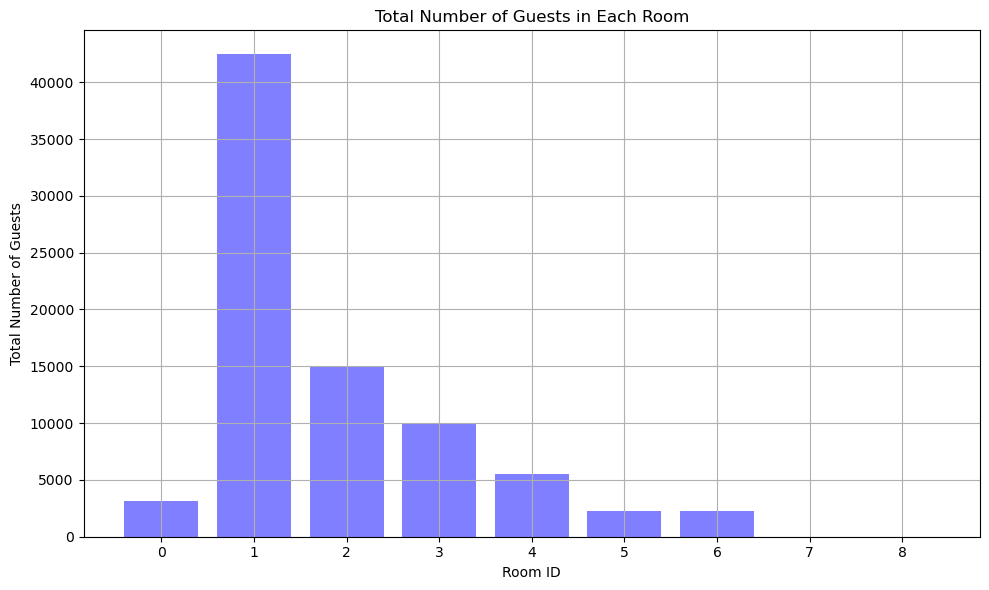

In [53]:
import matplotlib.pyplot as plt

# Assuming hotel_id_0 is your DataFrame containing columns room_id, num_children_guest, and num_older_guest
# Group the data by room_id and calculate the total number of guests in each room
grouped_data = hotel_id_0.groupby('tip_sobe_id').agg({'broj_djece_gostiju': 'sum', 'broj_odraslih_gostiju': 'sum'})

# Calculate the total number of guests in each room by summing num_children_guest and num_older_guests
grouped_data['total_guests'] = grouped_data['broj_djece_gostiju'] + grouped_data['broj_odraslih_gostiju']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['total_guests'], color='blue', alpha=0.5)

plt.xlabel('Room ID')
plt.ylabel('Total Number of Guests')
plt.title('Total Number of Guests in Each Room')
plt.grid(True)
plt.xticks(grouped_data.index)  # Set x-axis ticks to all room IDs
plt.tight_layout()
plt.show()

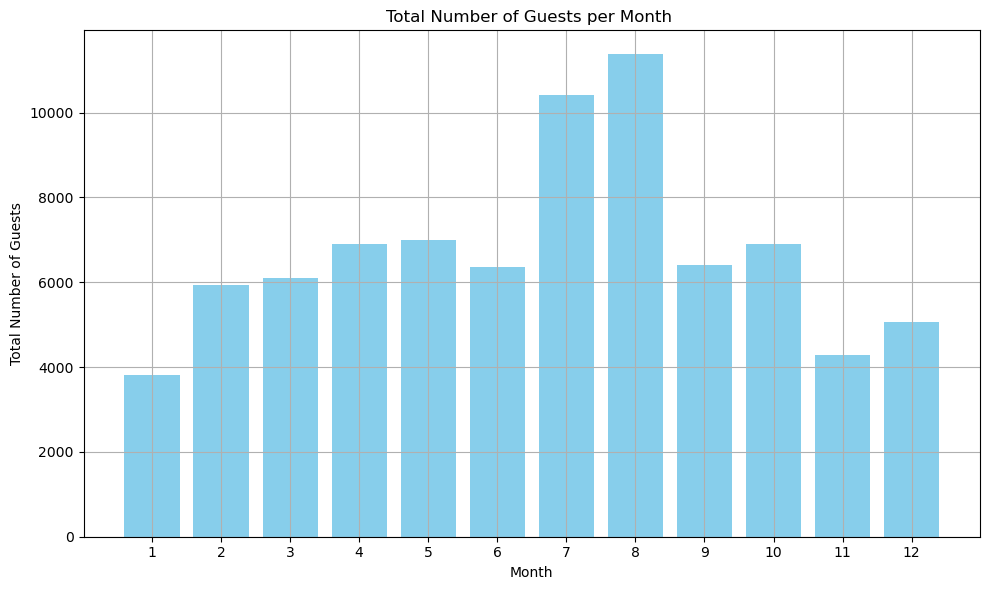

In [54]:
#PAZI NISI VODIO RACUNA O NEISPRAVNIM STUPCIMA U SMILSU JELI OTKAZANA REZERVACIJA!
#POTREBNO PRVO PROVJERITI SVE DATUME I ONDA UREDITI DATASET DA JE SVE U REDU I ONDA UVRSTITI U OVI GRAF!!!
# Make a copy of hotel_id_1
hotel_id_0_copy = hotel_id_0.copy()

# Add a new column 'total_guests' containing the sum of 'broj_odraslih_gostiju' and 'broj_djece_gostiju'
hotel_id_0_copy['total_guests'] = hotel_id_0_copy['broj_odraslih_gostiju'] + hotel_id_0_copy['broj_djece_gostiju']

# Group the data by month and calculate the total number of guests for each month
monthly_guests = hotel_id_0_copy.groupby(hotel_id_0_copy['datum_dolaska'].dt.month)['total_guests'].sum()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(monthly_guests.index, monthly_guests.values, color='skyblue')

plt.xlabel('Month')
plt.ylabel('Total Number of Guests')
plt.title('Total Number of Guests per Month ')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

## HOTEL_ID_1

In [55]:
hotel_id_1.head()

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id
40047,1,2015-11-01,2015-10-31,2015-11-03,None,1,0.0,PRT,2,1,100.000000,Check-Out,1353270,1039201
40048,1,2015-01-01,2015-01-01,2015-01-05,2015-07-01,2,0.0,PRT,2,1,97.930547,Canceled,1353271,1048285
40049,1,2015-07-01,2015-07-01,2015-07-05,2015-04-30,1,0.0,PRT,2,1,51.750074,Canceled,1353272,1044301
40050,1,2015-07-01,2015-02-03,2015-07-07,2015-06-23,2,0.0,PRT,2,1,50.350767,Canceled,1353273,1091699
40051,1,2015-07-02,2015-04-06,2015-07-04,2015-04-02,2,0.0,PRT,2,1,46.492642,Canceled,1353274,1077368


In [56]:
hotel_id_1.shape

(79163, 14)

In [57]:
tip_sobe=hotel_id_1["tip_sobe_id"].unique()
print(tip_sobe)

[1 8 2 5 3 4 0]


In [58]:
kanali_prodaje=hotel_id_1["kanal_prodaje_id"].unique()
print(kanali_prodaje)
#na temelju reezultata hotel 1 ima vise kanala prodaje-> također  moze utjecati na posjecenost->VEĆA DOSTUPNOST

[2 0 3 1 4]


In [59]:
hotel_id_1["kanal_prodaje_id"].value_counts()
#PREMA REZULTATIAMA-> oba hotela najvise prodavaju preko id 2, a najmanje preko preko 3

kanal_prodaje_id
2    68831
0     6749
1     3386
4      193
3        4
Name: count, dtype: int64

In [60]:
hotel_id_1["cijena_nocenja"].value_counts()

cijena_nocenja
100.000000    1111
75.000000      669
80.000000      398
60.000000      166
79.200000      160
              ... 
149.818176       1
160.570241       1
186.319996       1
94.453579        1
193.709372       1
Name: count, Length: 72153, dtype: int64

In [61]:
hotel_id_1["tip_sobe_id"].value_counts()

tip_sobe_id
1    62484
2    11747
5     1788
3     1537
8     1112
4      482
0       13
Name: count, dtype: int64

In [62]:
#Ukupan broj gostiju_odraslih za hotel 1
odrasli=hotel_id_1["broj_odraslih_gostiju"].sum()
print("ukupaan broj gostiju odraslih",odrasli)
#Ukupan broj gostiju djece
djeca=hotel_id_1["broj_djece_gostiju"].sum()
print("ukupaan broj gostiju djece:",djeca)

#Ukupan brojj gostiju
ukupno=hotel_id_1["broj_odraslih_gostiju"].sum()+hotel_id_1["broj_djece_gostiju"].sum()
print("ukupaan broj gostiju :",ukupno)
#POSTOTAK ODRASLIH  GOSTIJU
print("postotak odraaslih gostiju:",odrasli/ukupno)

#POSTOTAK ODRASLIH  GOSTIJU
print("postotak djece gostiju:",djeca/ukupno)

ukupaan broj gostiju odraslih 146838
ukupaan broj gostiju djece: 7640.0
ukupaan broj gostiju : 154478.0
postotak odraaslih gostiju: 0.9505431194085889
postotak djece gostiju: 0.049456880591411075


In [63]:
hotel_id_1[hotel_id_1["cijena_nocenja"]==100]["tip_sobe_id"].value_counts()

tip_sobe_id
1    856
2    101
4     55
3     36
8     31
5     30
0      2
Name: count, dtype: int64

In [64]:
# Group the data by 'datum_dolaska' and aggregate the 'broj_odraslih_gostiju','broj_djece_gostiju' and 'cijena_nocenja' columns
daily_guests = hotel_id_1.groupby('datum_dolaska').agg({
    'broj_odraslih_gostiju': 'sum',
    'broj_djece_gostiju': 'sum',
    'cijena_nocenja':'sum'
}).reset_index()
daily_guests['total_guests'] = daily_guests['broj_odraslih_gostiju'] + daily_guests['broj_djece_gostiju']


daily_guests

,datum_dolaska,broj_odraslih_gostiju,broj_djece_gostiju,cijena_nocenja,total_guests
0,2015-01-01,12,0.0,958.916556,12.0
1,2015-01-02,10,0.0,690.489952,10.0
2,2015-01-03,11,0.0,563.859813,11.0
3,2015-01-04,11,0.0,777.158054,11.0
4,2015-01-05,7,0.0,508.475171,7.0
...,...,...,...,...,...
942,2017-12-27,262,6.0,26736.680516,268.0
943,2017-12-28,244,10.0,25797.129377,254.0
944,2017-12-29,213,16.0,21975.972415,229.0
945,2017-12-30,261,9.0,25521.916383,270.0


In [65]:
# Find the maximum value of total guests
max_total_guests = daily_guests['total_guests'].max()

# Filter the DataFrame to get the row(s) with the highest number of total guests
row_highest_total_guests = daily_guests[daily_guests['total_guests'] == max_total_guests]

print("Row(s) with the highest number of total guests:")
print(row_highest_total_guests)

# Get the top 10 rows with the highest number of total guests
top_10_rows_highest_total_guests = daily_guests.nlargest(10, 'total_guests')

print("Top 10 rows with the highest number of total guests:")
top_10_rows_highest_total_guests

Row(s) with the highest number of total guests:
    datum_dolaska  broj_odraslih_gostiju  broj_djece_gostiju  cijena_nocenja  \
606    2016-12-26                    567                44.0    48797.400861   

     total_guests  
606         611.0  
Top 10 rows with the highest number of total guests:


,datum_dolaska,broj_odraslih_gostiju,broj_djece_gostiju,cijena_nocenja,total_guests
606,2016-12-26,567,44.0,48797.400861,611.0
607,2016-12-27,571,39.0,42920.406130,610.0
582,2016-12-02,575,30.0,44435.999986,605.0
609,2016-12-29,551,51.0,49056.070585,602.0
608,2016-12-28,544,41.0,47690.993786,585.0
141,2015-09-18,572,0.0,28979.219756,572.0
588,2016-12-08,525,44.0,43616.877863,569.0
219,2015-12-05,513,22.0,36118.192475,535.0
557,2016-11-07,522,10.0,47259.222096,532.0
587,2016-12-07,500,17.0,44710.833843,517.0


In [66]:
# Find the maximum sum value of broj_odraslih_gostiju 
max_broj_odraslih_gostiju = daily_guests['broj_odraslih_gostiju'].max()

# Filter the DataFrame to get the row(s) with the highest number of total guests
row_highest_broj_odraslih_gostiju = daily_guests[daily_guests['broj_odraslih_gostiju'] == max_broj_odraslih_gostiju]

print("Row(s) with the highest number of broj_odraslih_gostiju :")
print(row_highest_broj_odraslih_gostiju)

# Get the top 10 rows with the highest number of total guests
top_10_rows_highest_broj_odraslih_gostiju = daily_guests.nlargest(10, 'broj_odraslih_gostiju')

print("Top 10 rows with the highest number of broj_odraslih_gostiju:")
top_10_rows_highest_broj_odraslih_gostiju

Row(s) with the highest number of broj_odraslih_gostiju :
    datum_dolaska  broj_odraslih_gostiju  broj_djece_gostiju  cijena_nocenja  \
582    2016-12-02                    575                30.0    44435.999986   

     total_guests  
582         605.0  
Top 10 rows with the highest number of broj_odraslih_gostiju:


,datum_dolaska,broj_odraslih_gostiju,broj_djece_gostiju,cijena_nocenja,total_guests
582,2016-12-02,575,30.0,44435.999986,605.0
141,2015-09-18,572,0.0,28979.219756,572.0
607,2016-12-27,571,39.0,42920.406130,610.0
606,2016-12-26,567,44.0,48797.400861,611.0
609,2016-12-29,551,51.0,49056.070585,602.0
608,2016-12-28,544,41.0,47690.993786,585.0
588,2016-12-08,525,44.0,43616.877863,569.0
557,2016-11-07,522,10.0,47259.222096,532.0
219,2015-12-05,513,22.0,36118.192475,535.0
587,2016-12-07,500,17.0,44710.833843,517.0


In [67]:
# Find the maximum sum value of broj_djece_gostiju
max_broj_djece_gostiju = daily_guests['broj_djece_gostiju'].max()

# Filter the DataFrame to get the row(s) with the highest number of broj_djece_gostiju
row_highest_broj_djece_gostiju = daily_guests[daily_guests['broj_djece_gostiju'] == max_broj_djece_gostiju]

print("Row(s) with the highest number of broj_djece_gostiju :")
print(row_highest_broj_djece_gostiju)

# Get the top 10 rows with the highest number of broj_djece_gostiju
top_10_rows_highest_broj_djece_gostiju = daily_guests.nlargest(10, 'broj_djece_gostiju')

print("Top 10 rows with the highest number of broj_djece_gostiju:")
top_10_rows_highest_broj_djece_gostiju

Row(s) with the highest number of broj_djece_gostiju :
    datum_dolaska  broj_odraslih_gostiju  broj_djece_gostiju  cijena_nocenja  \
609    2016-12-29                    551                51.0    49056.070585   

     total_guests  
609         602.0  
Top 10 rows with the highest number of broj_djece_gostiju:


,datum_dolaska,broj_odraslih_gostiju,broj_djece_gostiju,cijena_nocenja,total_guests
609,2016-12-29,551,51.0,49056.070585,602.0
588,2016-12-08,525,44.0,43616.877863,569.0
606,2016-12-26,567,44.0,48797.400861,611.0
608,2016-12-28,544,41.0,47690.993786,585.0
607,2016-12-27,571,39.0,42920.406130,610.0
610,2016-12-30,478,35.0,47458.887947,513.0
603,2016-12-23,371,34.0,33289.750585,405.0
613,2017-01-02,363,33.0,27907.173156,396.0
818,2017-07-26,256,32.0,13385.005042,288.0
582,2016-12-02,575,30.0,44435.999986,605.0


In [68]:
# Find the maximum sum value of cijena_nocenja
max_cijena_nocenja = daily_guests['cijena_nocenja'].max()

# Filter the DataFrame to get the row(s) with the highest number of cijena_nocenja
row_highest_cijena_nocenja = daily_guests[daily_guests['cijena_nocenja'] == max_cijena_nocenja]

print("Row(s) with the highest number of cijena_nocenja :")
print(row_highest_cijena_nocenja)

# Get the top 10 rows with the highest number of cijena_nocenja
top_10_rows_highest_cijena_nocenja = daily_guests.nlargest(10, 'cijena_nocenja')

print("Top 10 rows with the highest number of cijena_nocenja:")
top_10_rows_highest_cijena_nocenja

Row(s) with the highest number of cijena_nocenja :
    datum_dolaska  broj_odraslih_gostiju  broj_djece_gostiju  cijena_nocenja  \
609    2016-12-29                    551                51.0    49056.070585   

     total_guests  
609         602.0  
Top 10 rows with the highest number of cijena_nocenja:


,datum_dolaska,broj_odraslih_gostiju,broj_djece_gostiju,cijena_nocenja,total_guests
609,2016-12-29,551,51.0,49056.070585,602.0
606,2016-12-26,567,44.0,48797.400861,611.0
608,2016-12-28,544,41.0,47690.993786,585.0
610,2016-12-30,478,35.0,47458.887947,513.0
557,2016-11-07,522,10.0,47259.222096,532.0
587,2016-12-07,500,17.0,44710.833843,517.0
582,2016-12-02,575,30.0,44435.999986,605.0
588,2016-12-08,525,44.0,43616.877863,569.0
607,2016-12-27,571,39.0,42920.406130,610.0
601,2016-12-21,477,28.0,41368.007710,505.0


In [69]:
# 1. Filter the DataFrame to include only data for the top 10 countries with the highest counts
top_10_countries = hotel_id_1["zemlja_gosta"].value_counts().nlargest(10).index
filtered_data = hotel_id_1[hotel_id_1["zemlja_gosta"].isin(top_10_countries)]

# 2. Group the filtered data by 'zemlja_gosta' and aggregate the 'cijena_nocenja' column to find the sum of accommodation prices for each country
sum_accommodation_prices_by_country = filtered_data.groupby('zemlja_gosta')['cijena_nocenja'].sum()


# Sort the sum of accommodation prices for each country in descending order
sorted_sum_accommodation_prices = sum_accommodation_prices_by_country.sort_values(ascending=False)

# Display the sorted result
print("Sum of accommodation prices for each country among the top 10 countries with the highest counts (sorted in descending order):")
print(sorted_sum_accommodation_prices.apply(lambda x: '{:.2f}'.format(x)))

Sum of accommodation prices for each country among the top 10 countries with the highest counts (sorted in descending order):
zemlja_gosta
PRT    3560648.53
FRA    1045289.00
GBR     724146.94
DEU     679329.21
ESP     620709.04
ITA     408862.79
BEL     230608.48
BRA     222590.44
USA     205955.72
NLD     196836.59
Name: cijena_nocenja, dtype: object


In [70]:
# Group the original DataFrame by 'zemlja_gosta' and calculate the sum of accommodation prices for each country
sum_accommodation_prices_by_country = hotel_id_1.groupby('zemlja_gosta')['cijena_nocenja'].sum()

# Sort the sum of accommodation prices for each country in descending order
sorted_sum_accommodation_prices = sum_accommodation_prices_by_country.sort_values(ascending=False).head(20)

# Display the sorted result
print("Sum of accommodation prices for each country (sorted in descending order):")
print(sorted_sum_accommodation_prices.apply(lambda x: '{:.2f}'.format(x)))

Sum of accommodation prices for each country (sorted in descending order):
zemlja_gosta
PRT    3560648.53
FRA    1045289.00
GBR     724146.94
DEU     679329.21
ESP     620709.04
ITA     408862.79
BEL     230608.48
BRA     222590.44
USA     205955.72
NLD     196836.59
IRL     181028.73
CHE     166235.67
AUT     126728.96
CHN     106514.66
SWE      89143.86
CN       75633.94
ISR      75393.95
POL      73001.81
NOR      61405.19
RUS      54917.79
Name: cijena_nocenja, dtype: object


In [71]:
# 1. Filter the DataFrame to include only data for the top 10 countries with the highest spending
top_10_countries = hotel_id_1.groupby('zemlja_gosta')['cijena_nocenja'].sum().nlargest(10).index
filtered_data = hotel_id_1[hotel_id_1['zemlja_gosta'].isin(top_10_countries)]

# 2. Group the filtered data by both 'zemlja_gosta' and 'datum_dolaska' and calculate the total spending for each day for each country
daily_spending_by_country = filtered_data.groupby(['zemlja_gosta', 'datum_dolaska'])['cijena_nocenja'].sum()

# 3. Find the top 5 days with the highest spending for each country
top_5_days_spending_by_country = daily_spending_by_country.groupby(level='zemlja_gosta').nlargest(5)

# 4. Display the top 5 days with the highest spending for each country
print("Top 5 days with the highest spending for each country:")
print(top_5_days_spending_by_country)

# 5. Group the filtered data by 'zemlja_gosta' and the month of 'datum_dolaska' and calculate the total spending for each month for each country
monthly_spending_by_country = filtered_data.groupby([filtered_data['zemlja_gosta'], filtered_data['datum_dolaska'].dt.month])['cijena_nocenja'].sum()

# 6. Find the month with the highest spending for each country
max_spending_month_by_country = monthly_spending_by_country.groupby(level='zemlja_gosta').idxmax()

# 7. Display the month with the highest spending for each country
print("\nMonth with the highest spending for each country:")
print(max_spending_month_by_country)

Top 5 days with the highest spending for each country:
zemlja_gosta  zemlja_gosta  datum_dolaska
BEL           BEL           2017-12-30        2677.077041
                            2016-11-01        2124.648250
                            2017-12-10        1884.884781
                            2017-12-25        1744.927750
                            2017-12-02        1624.978774
BRA           BRA           2016-12-27        8879.420104
                            2016-12-30        3873.983791
                            2016-12-29        2583.238394
                            2016-12-26        2391.745501
                            2017-01-18        2041.495655
DEU           DEU           2016-12-23        4965.546860
                            2016-10-14        4885.084383
                            2016-12-16        4432.741351
                            2016-09-13        4262.850107
                            2016-10-23        3938.011110
ESP           ESP           2015-

In [72]:

# Make a copy of hotel_id_1
hotel_id_1_copy = hotel_id_1.copy()

# Add a new column 'total_guests' by summing 'broj_odraslih_gostiju' and 'broj_djece_gostiju'
hotel_id_1_copy['total_guests'] = hotel_id_1_copy['broj_odraslih_gostiju'] + hotel_id_1_copy['broj_djece_gostiju']

# Filter the DataFrame to include only data for the top 10 countries with the highest spending
top_10_countries = hotel_id_1_copy.groupby('zemlja_gosta')['total_guests'].sum().nlargest(10).index
filtered_data = hotel_id_1_copy[hotel_id_1_copy['zemlja_gosta'].isin(top_10_countries)]

# Group the filtered data by both 'zemlja_gosta' and 'datum_dolaska' and calculate the total number of guests for each day for each country
daily_guests_by_country = filtered_data.groupby(['zemlja_gosta', 'datum_dolaska'])['total_guests'].sum()

# Find the top 5 days with the highest number of guests for each country
top_5_days_guests_by_country = daily_guests_by_country.groupby(level='zemlja_gosta').nlargest(5)

# Display the top 5 days with the highest number of guests for each country
print("Top 5 Days with the Highest Number of Guests for Each Country:")
print(top_5_days_guests_by_country)
print("\n")

# Group the filtered data by 'zemlja_gosta' and the month of 'datum_dolaska' and calculate the total number of guests for each month for each country
monthly_guests_by_country = filtered_data.groupby([filtered_data['zemlja_gosta'], filtered_data['datum_dolaska'].dt.month])['total_guests'].sum()

# Find the month with the highest number of guests for each country
max_guests_month_by_country = monthly_guests_by_country.groupby(level='zemlja_gosta').idxmax()

# Display the month with the highest number of guests for each country
print("Month with the Highest Number of Guests for Each Country:")
print(max_guests_month_by_country)

Top 5 Days with the Highest Number of Guests for Each Country:
zemlja_gosta  zemlja_gosta  datum_dolaska
BEL           BEL           2016-09-21        30.0
                            2016-11-01        30.0
                            2017-12-30        26.0
                            2017-07-16        23.0
                            2017-07-18        22.0
BRA           BRA           2016-12-27       151.0
                            2016-12-30        40.0
                            2016-12-26        37.0
                            2016-12-29        31.0
                            2017-01-18        30.0
DEU           DEU           2016-09-13        80.0
                            2016-06-15        71.0
                            2016-10-14        71.0
                            2016-07-21        68.0
                            2017-06-25        62.0
ESP           ESP           2015-12-05       190.0
                            2016-12-08       117.0
                            

In [121]:
#OVO SAN NAPRAVIO ZA DRZAVE KOJE SU SUSJEDNE HRVATSKOJ!

# Define the list of countries
countries = ['HRV', 'ALB', 'BIH', 'SRB', 'SLV', 'ITA', 'MNE', 'HUN']

# Create an empty dictionary to store results
results = {}

# Make a copy of hotel_id_1
hotel_id_1_copy = hotel_id_1.copy()

# Add a new column 'total_guests' by summing the columns 'broj_odraslih_gostiju' and 'broj_djece_gostiju'
hotel_id_1_copy['total_guests'] = hotel_id_1_copy['broj_odraslih_gostiju'] + hotel_id_1_copy['broj_djece_gostiju']
# Loop through each country
for country in countries:
    # Filter the DataFrame for the current country
    country_data = hotel_id_1_copy[hotel_id_1_copy['zemlja_gosta'] == country]
    
    # Find the date with the highest total guests
    max_guests_date = country_data.loc[country_data['total_guests'].idxmax(), 'datum_dolaska']
    
    # Find the month with the highest total guests
    max_guests_month = country_data.groupby(country_data['datum_dolaska'].dt.month)['total_guests'].sum().idxmax()
    
    # Find the top 5 highest visited days
    top_5_days = country_data.groupby('datum_dolaska')['total_guests'].sum().nlargest(5)
    
    # Store results for the current country
    results[country] = {'max_guests_date': max_guests_date, 'max_guests_month': max_guests_month, 'top_5_days': top_5_days}

# Display the results
for country, data in results.items():
    print(f"Country: {country}")
    print(f"Date with the highest total guests: {data['max_guests_date']}")
    print(f"Month with the highest total guests: {data['max_guests_month']}")
    print("Top 5 highest visited days:")
    print(data['top_5_days'])
    print()

Country: HRV
Date with the highest total guests: 2016-10-25 00:00:00
Month with the highest total guests: 12
Top 5 highest visited days:
datum_dolaska
2016-03-28    5.0
2017-06-01    5.0
2016-06-03    4.0
2016-10-25    4.0
2016-11-21    4.0
Name: total_guests, dtype: float64

Country: ALB
Date with the highest total guests: 2015-12-18 00:00:00
Month with the highest total guests: 1
Top 5 highest visited days:
datum_dolaska
2017-01-09    4.0
2015-12-18    2.0
2016-07-25    2.0
2016-12-07    2.0
2017-02-08    2.0
Name: total_guests, dtype: float64

Country: BIH
Date with the highest total guests: 2017-04-01 00:00:00
Month with the highest total guests: 6
Top 5 highest visited days:
datum_dolaska
2016-12-31    4.0
2017-04-01    3.0
2016-06-11    2.0
2016-06-22    2.0
2016-10-25    2.0
Name: total_guests, dtype: float64

Country: SRB
Date with the highest total guests: 2016-12-21 00:00:00
Month with the highest total guests: 6
Top 5 highest visited days:
datum_dolaska
2016-06-24    27.0
20

In [74]:
hotel_id_1["broj_odraslih_gostiju"].value_counts()

broj_odraslih_gostiju
2    58255
1    15879
3     4775
0      223
4       31
Name: count, dtype: int64

In [75]:
# Top 5 highest values
top_5_highest = hotel_id_1['cijena_nocenja'].nlargest(5)
print("Top 5 highest values:")
print(top_5_highest)

# Top 5 lowest values
top_5_lowest = hotel_id_1['cijena_nocenja'].nsmallest(5)
print("\nTop 5 lowest values:")
print(top_5_lowest)

# Get the index of the row with the highest value in cijena_nocenja column
highest_price_index = hotel_id_1['cijena_nocenja'].idxmax()

# Get the row corresponding to the highest value
row_with_highest_price = hotel_id_1.loc[highest_price_index]

print("Row with the highest value in prices_per_night column:")
print(row_with_highest_price)

# Get the index of the row with the lowest value in cijena_nocenja column
lowest_price_index = hotel_id_1['cijena_nocenja'].idxmin()

# Get the row corresponding to the lowest value
row_with_lowest_price = hotel_id_1.loc[lowest_price_index]

print("Row with the lowest value in prices_per_night column:")
print(row_with_lowest_price)


Top 5 highest values:
48491     7351.295691
103784     724.487968
103661     611.191670
111239     607.039627
109981     584.032185
Name: cijena_nocenja, dtype: float64

Top 5 lowest values:
73678    40.004374
42874    40.012298
89421    40.036573
76678    40.040133
49908    40.100724
Name: cijena_nocenja, dtype: float64
Row with the highest value in prices_per_night column:
hotel_id                                           1
datum_dolaska                    2016-01-25 00:00:00
datum_kreiranja_rezervacije      2016-01-01 00:00:00
datum_odjave                     2016-01-26 00:00:00
datum_otkazivanja_rezervacije             2016-02-19
broj_odraslih_gostiju                              2
broj_djece_gostiju                               0.0
zemlja_gosta                                     PRT
kanal_prodaje_id                                   2
tip_sobe_id                                        1
cijena_nocenja                           7351.295691
status_rezervacije                     

In [76]:
#MINIMALNE CIJENE SU SLIČNE ZA OBA HOTELA
#DOK MAKSIMALNA CIJENA-> za hotel 1 je došla i do iznosa od 7351, a ovo osatlo je sve otprilike podjednako

In [77]:
nula_odraslih_gostiju=hotel_id_1[hotel_id_1["broj_odraslih_gostiju"]==0]
nula_odraslih_gostiju.head(10)

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id
40969,1,2015-08-10,2015-07-29,2015-08-12,None,0,3.0,PRT,0,8,107.560385,Check-Out,1354192,1052475
41032,1,2015-08-11,2014-12-31,2015-08-14,None,0,2.0,FRA,2,8,105.380358,Check-Out,1354255,1097197
41429,1,2015-11-16,2015-10-05,2015-11-18,None,0,2.0,PRT,0,8,108.851783,Check-Out,1354652,1072102
41935,1,2015-08-28,2015-04-19,2015-08-29,None,0,2.0,PRT,0,8,100.000000,Check-Out,1355158,1102402
45137,1,2015-12-19,2015-02-19,2015-12-23,2015-09-02,0,2.0,PRT,2,8,109.006090,Canceled,1358360,1090238
46111,1,2015-12-13,2014-06-03,2015-12-14,2015-12-10,0,3.0,PRT,2,8,170.787591,Canceled,1359334,1097602
46129,1,2015-12-18,2015-09-01,2015-12-19,None,0,3.0,PRT,2,8,125.037363,Check-Out,1359352,1055147
46165,1,2015-12-23,2015-12-13,2015-12-26,None,0,2.0,ESP,2,8,109.792132,Check-Out,1359388,1077125
46175,1,2015-12-24,2015-02-16,2015-12-26,2015-12-19,0,2.0,BEL,2,8,115.480590,Canceled,1359398,1043833
46199,1,2015-12-26,2015-10-10,2015-12-29,None,0,2.0,ESP,2,8,137.904736,Check-Out,1359422,1049102


In [78]:
#PROVJERA datum dolaska i odlaska da su kronološki
hotel_id_1["datum_dolaska"]=pd.to_datetime(hotel_id_1["datum_dolaska"])
hotel_id_1["datum_odjave"]=pd.to_datetime(hotel_id_1["datum_odjave"])

is_valid=hotel_id_1["datum_odjave"]>=hotel_id_1["datum_dolaska"]
invalid_rows=hotel_id_1[~is_valid]

if invalid_rows.empty:
    print("ispravni datumi")
else:
    print("ima neispravnih redova")
    print(len(invalid_rows))
    print(invalid_rows.head(10))


ispravni datumi


/tmp/ipykernel_9061/2779042842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_id_1["datum_dolaska"]=pd.to_datetime(hotel_id_1["datum_dolaska"])
/tmp/ipykernel_9061/2779042842.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_id_1["datum_odjave"]=pd.to_datetime(hotel_id_1["datum_odjave"])


In [79]:
#OTKRIO SI DA IMAS DATUM OTKAZIVANJA REZERVACIJE u recima gdje su dosli gosti 
# ZA hotel 1 datumi su kronološki ispravni

In [80]:
hotel_id_1["cijena_nocenja"].mean()

121.17892426495924

In [81]:
print("Broj otkazanih rezervacija za hotel_id_1:",len(hotel_id_1.index)-hotel_id_1["datum_otkazivanja_rezervacije"].isnull().sum())

Broj otkazanih rezervacija za hotel_id_1: 33079


In [82]:
#Postotak Koliko se rezervacija otkaze
print((len(hotel_id_1.index)-hotel_id_1["datum_otkazivanja_rezervacije"].isnull().sum())/len(hotel_id_1.index))

0.4178593534858457


In [83]:
#how many people come from which country
countries_count=hotel_id_1["zemlja_gosta"].value_counts()
print(countries_count.head(10))


zemlja_gosta
PRT    32096
FRA     8220
GBR     5738
DEU     5578
ESP     4788
ITA     3120
BEL     1762
BRA     1701
USA     1525
NLD     1525
Name: count, dtype: int64


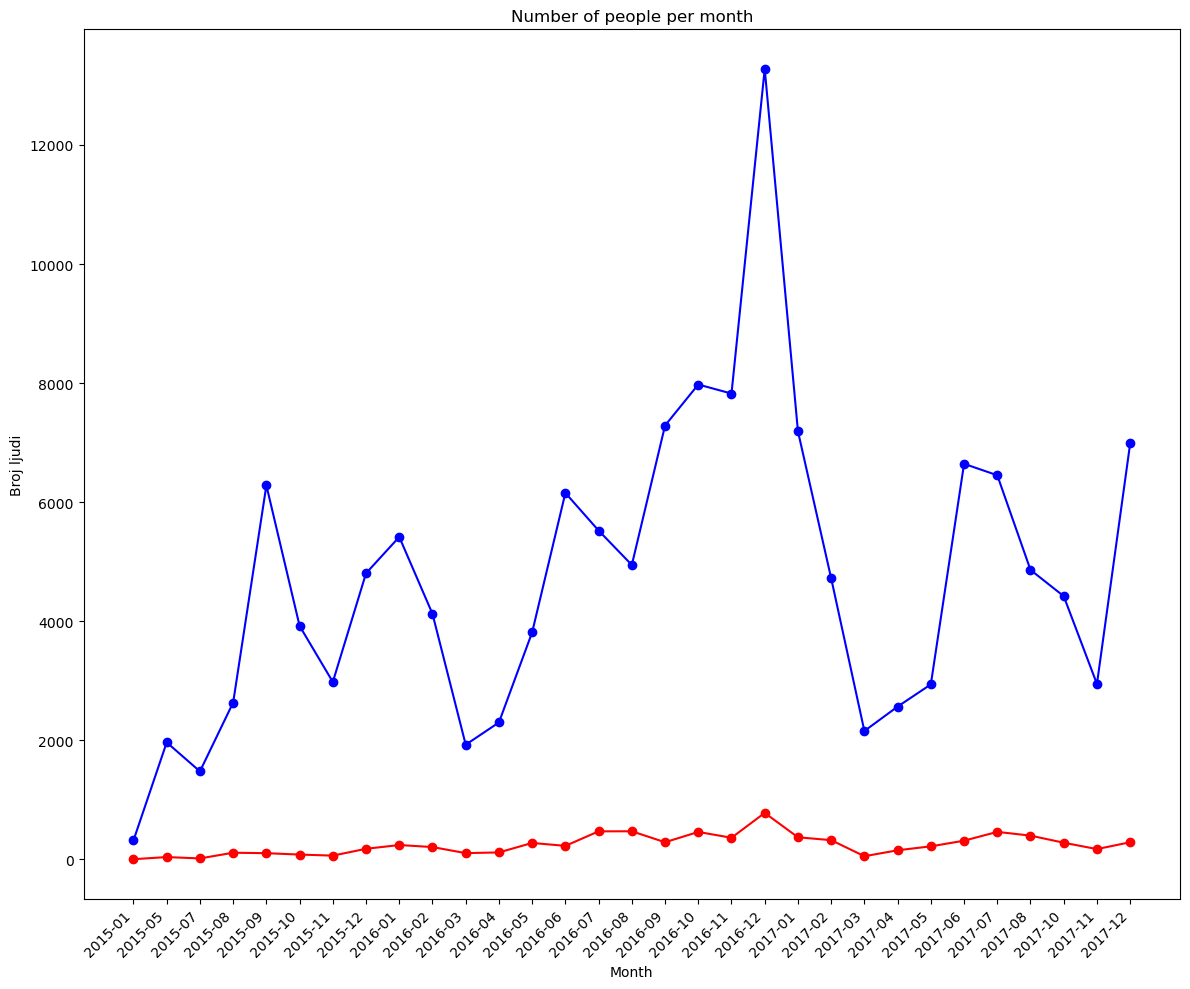

In [84]:
import matplotlib.pyplot as plt

proba = pd.to_datetime(hotel_id_1['datum_dolaska'])

monthly_data = hotel_id_1.groupby(proba.dt.to_period("M")).agg({'broj_odraslih_gostiju':'sum'}).reset_index()
monthly_data_djeca = hotel_id_1.groupby(proba.dt.to_period("M")).agg({'broj_djece_gostiju':'sum'}).reset_index()

plt.figure(figsize=(12,10))

plt.plot(monthly_data['datum_dolaska'].dt.strftime('%Y-%m').values, monthly_data['broj_odraslih_gostiju'].values, marker='o', linestyle='-', color='b')
plt.plot(monthly_data_djeca['datum_dolaska'].dt.strftime('%Y-%m').values, monthly_data_djeca['broj_djece_gostiju'].values, marker='o', linestyle='-', color='r')

plt.title('Number of people per month')
plt.xlabel('Month')
plt.ylabel('Broj ljudi')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

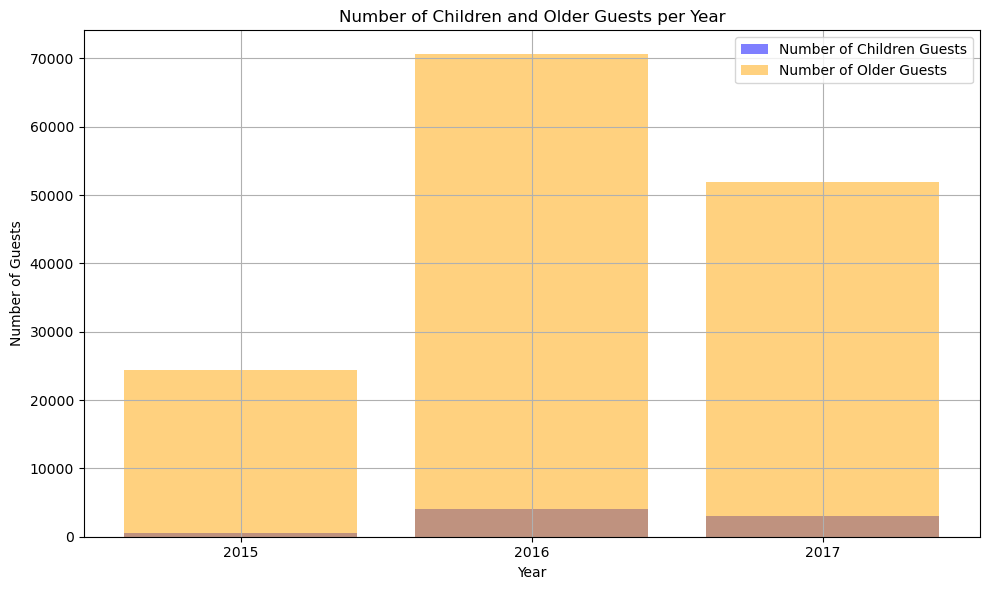

In [85]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Group the data by year and calculate the total number of children and older guests per year
grouped_data = hotel_id_1.groupby(hotel_id_1['datum_dolaska'].dt.year).agg({'broj_djece_gostiju': 'sum', 'broj_odraslih_gostiju': 'sum'})

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['broj_djece_gostiju'], color='blue', alpha=0.5, label='Number of Children Guests')
plt.bar(grouped_data.index, grouped_data['broj_odraslih_gostiju'], color='orange', alpha=0.5, label='Number of Older Guests')

plt.xlabel('Year')
plt.ylabel('Number of Guests')
plt.title('Number of Children and Older Guests per Year')
plt.legend()
plt.grid(True)
plt.xticks(grouped_data.index)  # Show all years on x-axis
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

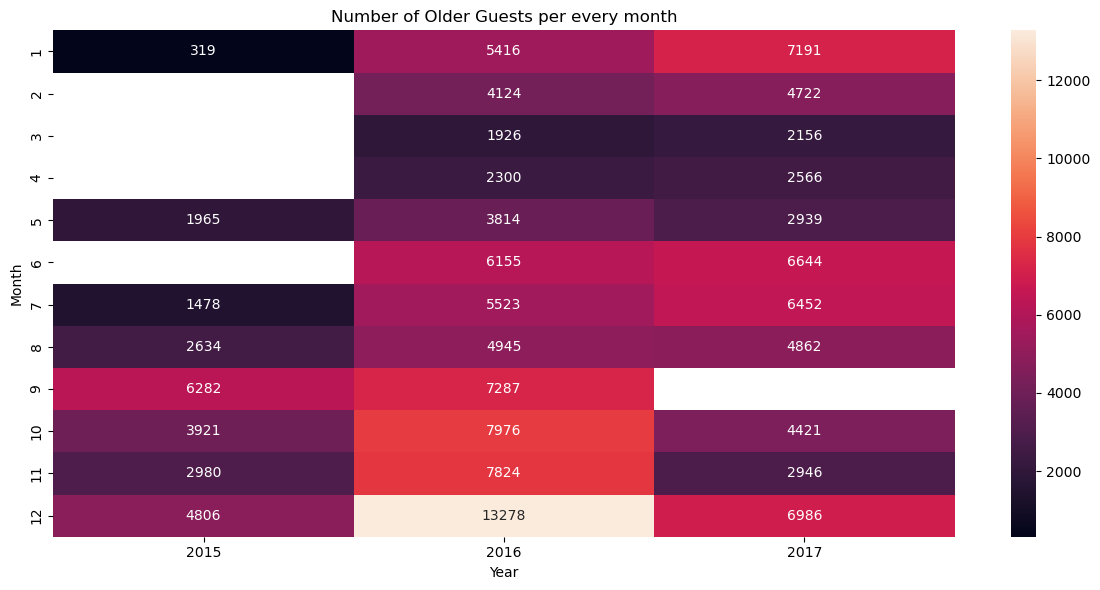

In [86]:
#show the number of guests per years for column "datum_dolaska" per months thru the years -> "broj_odraslih_gostiju"
#represented as heatmap
import seaborn as sns
import matplotlib.pyplot as plt

monthly_sum=hotel_id_1.groupby([hotel_id_1["datum_dolaska"].dt.year.rename("year"),hotel_id_1["datum_dolaska"].dt.month.rename("month")])["broj_odraslih_gostiju"].sum().reset_index()
#pivot_table=monthly_sum.pivot("month","year","broj_odraslih_gostiju")
pivot_table = monthly_sum.pivot(
    index="month",
    columns="year",
    values="broj_odraslih_gostiju"
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table,annot=True,fmt="g")

plt.xlabel('Year')
plt.ylabel('Month')
plt.title("Number of Older Guests per every month")
plt.tight_layout()
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

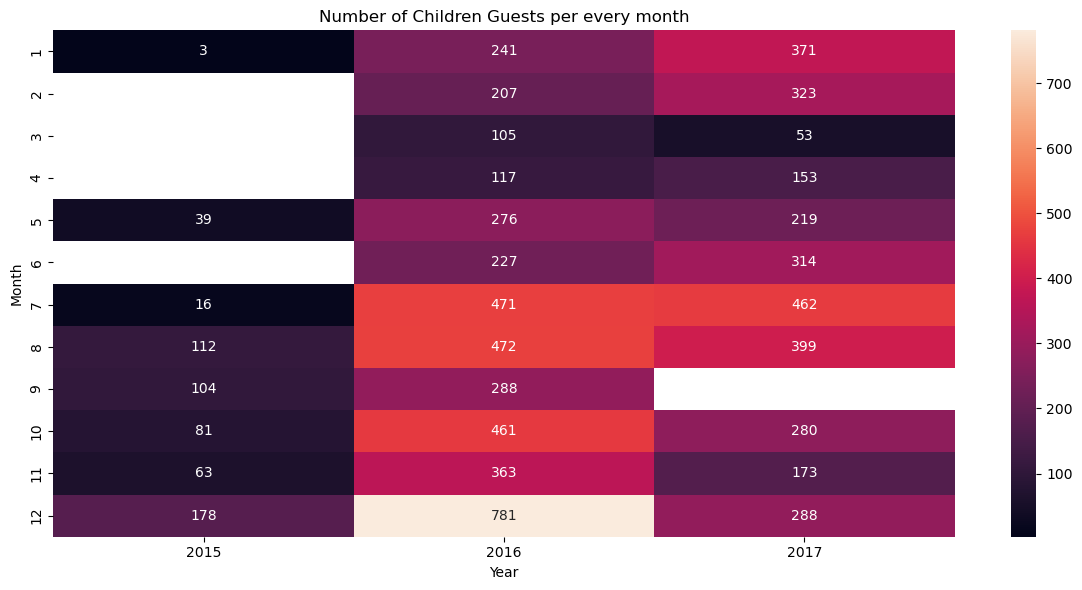

In [87]:
#show the number of guests per years for column "datum_dolaska" per months thru the years -> "broj_djece_gostiju"
#represented as heatmap

monthly_sum=hotel_id_1.groupby([original_data["datum_dolaska"].dt.year.rename("year"),hotel_id_1["datum_dolaska"].dt.month.rename("month")])["broj_djece_gostiju"].sum().reset_index()
#pivot_table=monthly_sum.pivot("month","year","broj_djece_gostiju")
pivot_table = monthly_sum.pivot(
    index="month",
    columns="year",
    values="broj_djece_gostiju"
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table,annot=True,fmt="g")

plt.xlabel('Year')
plt.ylabel('Month')
plt.title("Number of Children Guests per every month")
plt.tight_layout()
plt.show


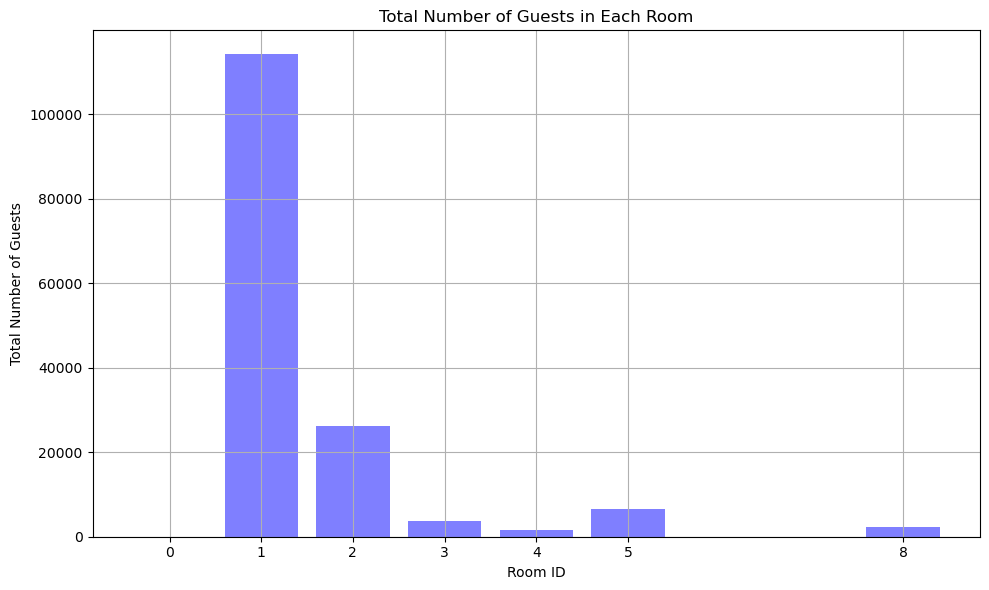

In [88]:
import matplotlib.pyplot as plt

# Assuming hotel_id_0 is your DataFrame containing columns room_id, num_children_guest, and num_older_guest
# Group the data by room_id and calculate the total number of guests in each room
grouped_data = hotel_id_1.groupby('tip_sobe_id').agg({'broj_djece_gostiju': 'sum', 'broj_odraslih_gostiju': 'sum'})

# Calculate the total number of guests in each room by summing num_children_guest and num_older_guests
grouped_data['total_guests'] = grouped_data['broj_djece_gostiju'] + grouped_data['broj_odraslih_gostiju']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['total_guests'], color='blue', alpha=0.5)

plt.xlabel('Room ID')
plt.ylabel('Total Number of Guests')
plt.title('Total Number of Guests in Each Room')
plt.grid(True)
plt.xticks(grouped_data.index)  # Set x-axis ticks to all room IDs
plt.tight_layout()
plt.show()

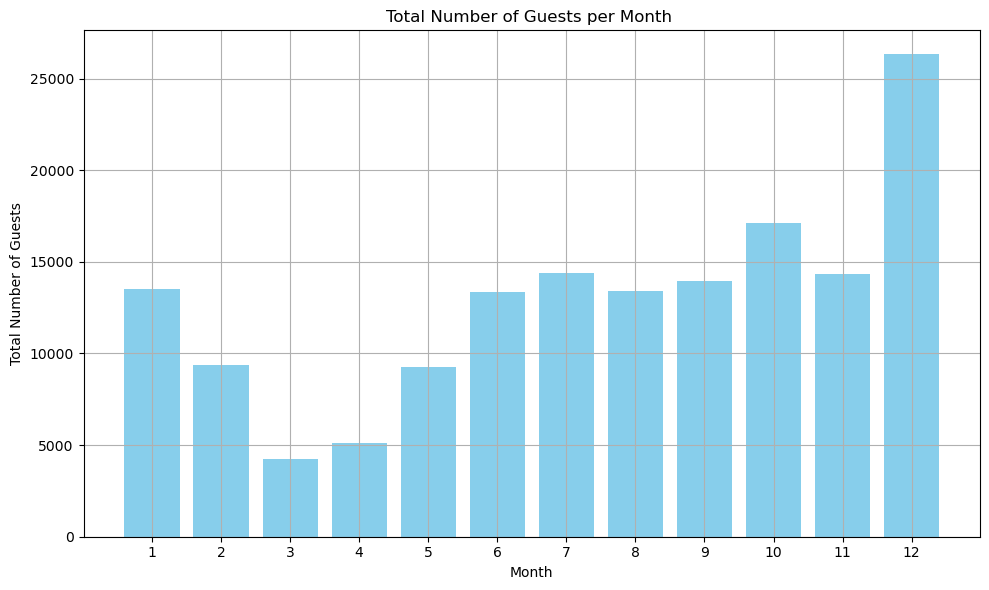

In [89]:

# Make a copy of hotel_id_1
hotel_id_1_copy = hotel_id_1.copy()

# Add a new column 'total_guests' containing the sum of 'broj_odraslih_gostiju' and 'broj_djece_gostiju'
hotel_id_1_copy['total_guests'] = hotel_id_1_copy['broj_odraslih_gostiju'] + hotel_id_1_copy['broj_djece_gostiju']

# Group the data by month and calculate the total number of guests for each month
monthly_guests = hotel_id_1_copy.groupby(hotel_id_1_copy['datum_dolaska'].dt.month)['total_guests'].sum()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(monthly_guests.index, monthly_guests.values, color='skyblue')

plt.xlabel('Month')
plt.ylabel('Total Number of Guests')
plt.title('Total Number of Guests per Month ')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

In [90]:

    #Hotelsa id 1 je primio više gostiju
    #Prosjecna cijena nocenja kod hotela 0 je veca nego kod hotela 1->   što može biti faktor->jeftinija cijena vise gostiju 
    #Postotak otkazivanja rezervacija je veći u hotel 1
    #Hotel s id 0 ima 9 vrsta soba, hotel s id 1 ima 7 vrsta soba ->moguć razlog veće cijene
    #za hotel 1 i 0 isti je redosljed po broj gostiju po sobi->2,1,3
    #ZANIMLJIV DETALJ-> a hotel 1 ima da je bilo 223 puta sa 0 odraslih gostiju?-> vidit šta sa tim
    #PROVJERITI ZA SOBE-> npr primjetia si da u sobu_id 8 su samo djeca
                        #->prouci najskuplju sobu, najeftinij sobu...